<a href="https://colab.research.google.com/github/Karimi-Gichunge/IP_Core_Week_7/blob/master/Moringa_Data_Science_Core_W7_Independent_Project_2020_09_Winfred_Karimi_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis and Regression modelling of house pricing

## 1. Defining the Question

### a) Specifying the Data Analytic Question

To study the factors that affect housing prices using different features that affect the real estate sector. 

Create a model that can be used to accurately predict the sale of houses. 

### b) Defining the Metric for Success

The project will be a success if we are able to create a model that will allow Hass Consulting Company to accurately predict the sale of prices upon being provided with the predictor variables.


### c) Understanding the context 

Hass Consulting Company is a real estate leader with over 25 years of experience. This study will study the factors that affect housing prices using the given information on real estate properties owned that was collected over the past few months. We will then create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 



### d) Experimental design taken

In this study, we will be conducting Exploratory Data Analysis to study the relationships between the different variables. Later we will create a number of regression models to try find the most accurate model to predict housing prices


### e) Data Relevance

Our data contains variables that affect housing price and prices of the houses 

**Definition of variables:**

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

## 2. Reading the Data

In [ ]:
#First we will import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#plt.rcParams['figure.figsize'] = (12,6)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('house_data.csv')
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## 3. Checking the Data

In [ ]:
data.shape
#The dataset has 21613 rows and 20 columns

(21613, 20)

In [ ]:
data.dtypes
#The dataset has correct datatypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
data.isnull().sum()
#No null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
pd.set_option('float_format', '{:f}'.format)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540182.158793,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312049,367362.231718,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data['condition'].unique()

array([3, 5, 4, 1, 2])

We will assume that in the column condition;

1 means Very Good Condition

2 means Good Condition

3 means Fair Condition

4 means Poor Condition

5 means Very Poor Condition

In [ ]:
data['grade'].unique()
#The grades of houses run from grade 1 to grade 13

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [ ]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
data['view'].unique()

array([0, 3, 4, 2, 1])

## 4. Tidying the Dataset

In [ ]:
#Anomalies
#We realize from the data description that there is one house with 33bedro0ms
#Checking it out
# df_bed = data['bedrooms'] == 33
# df_bed
df_bed = data[(data.bedrooms == 33)]
df_bed


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.000000,33,1.750000,1620,6000,1.000000,0,0,5,7,1040,580,1947,0,98103,47.687800,-122.331000,1330,4700


In [ ]:
#The house has 1.75bathrooms and a sqft of 1620 which is not ideal for a 33bedroomed house from logic
#We change the bedrooms to 3
data['bedrooms'] = data['bedrooms'].replace([33],3)
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

In [ ]:
#The second anomaly is that the minimum number of bathrooms is 0
#From logic, we can't have houses with no bathrooms
df_bath = data[(data.bathrooms == 0)]
df_bath

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,1100000.000000,0,0.000000,3064,4764,3.500000,0,2,3,7,3064,0,1990,0,98102,47.636200,-122.322000,2360,4000
1149,3421079032,75000.000000,1,0.000000,670,43377,1.000000,0,0,3,3,670,0,1966,0,98022,47.263800,-121.906000,1160,42882
3119,3918400017,380000.000000,0,0.000000,1470,979,3.000000,0,2,3,8,1470,0,2006,0,98133,47.714500,-122.356000,1470,1399
5832,5702500050,280000.000000,1,0.000000,600,24501,1.000000,0,0,2,3,600,0,1950,0,98045,47.531600,-121.749000,990,22549
6994,2954400190,1300000.000000,0,0.000000,4810,28008,2.000000,0,0,3,12,4810,0,1990,0,98053,47.664200,-122.069000,4740,35061
9773,3374500520,355000.000000,0,0.000000,2460,8049,2.000000,0,0,3,8,2460,0,1990,0,98031,47.409500,-122.168000,2520,8050
9854,7849202190,235000.000000,0,0.000000,1470,4800,2.000000,0,0,3,7,1470,0,1996,0,98065,47.526500,-121.828000,1060,7200
10481,203100435,484000.000000,1,0.000000,690,23244,1.000000,0,0,4,7,690,0,1948,0,98053,47.642900,-121.955000,1690,19290
14423,9543000205,139950.000000,0,0.000000,844,4269,1.000000,0,0,4,7,844,0,1913,0,98001,47.278100,-122.250000,1380,9600
19452,3980300371,142000.000000,0,0.000000,290,20875,1.000000,0,0,1,1,290,0,1963,0,98024,47.530800,-121.888000,1620,22850


In [ ]:

data =  data[data.bathrooms != 0]
data['bathrooms'].unique()


array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [ ]:
#Renaming columns 
data.rename(columns={'sqft_living':'living_area',
                     'sqft_lot':'parking_area',
                     }, 
                 inplace=True)
 
data.head()

,id,price,bedrooms,bathrooms,living_area,parking_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,6414100192,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,5631500400,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,2487200875,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1954400510,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503


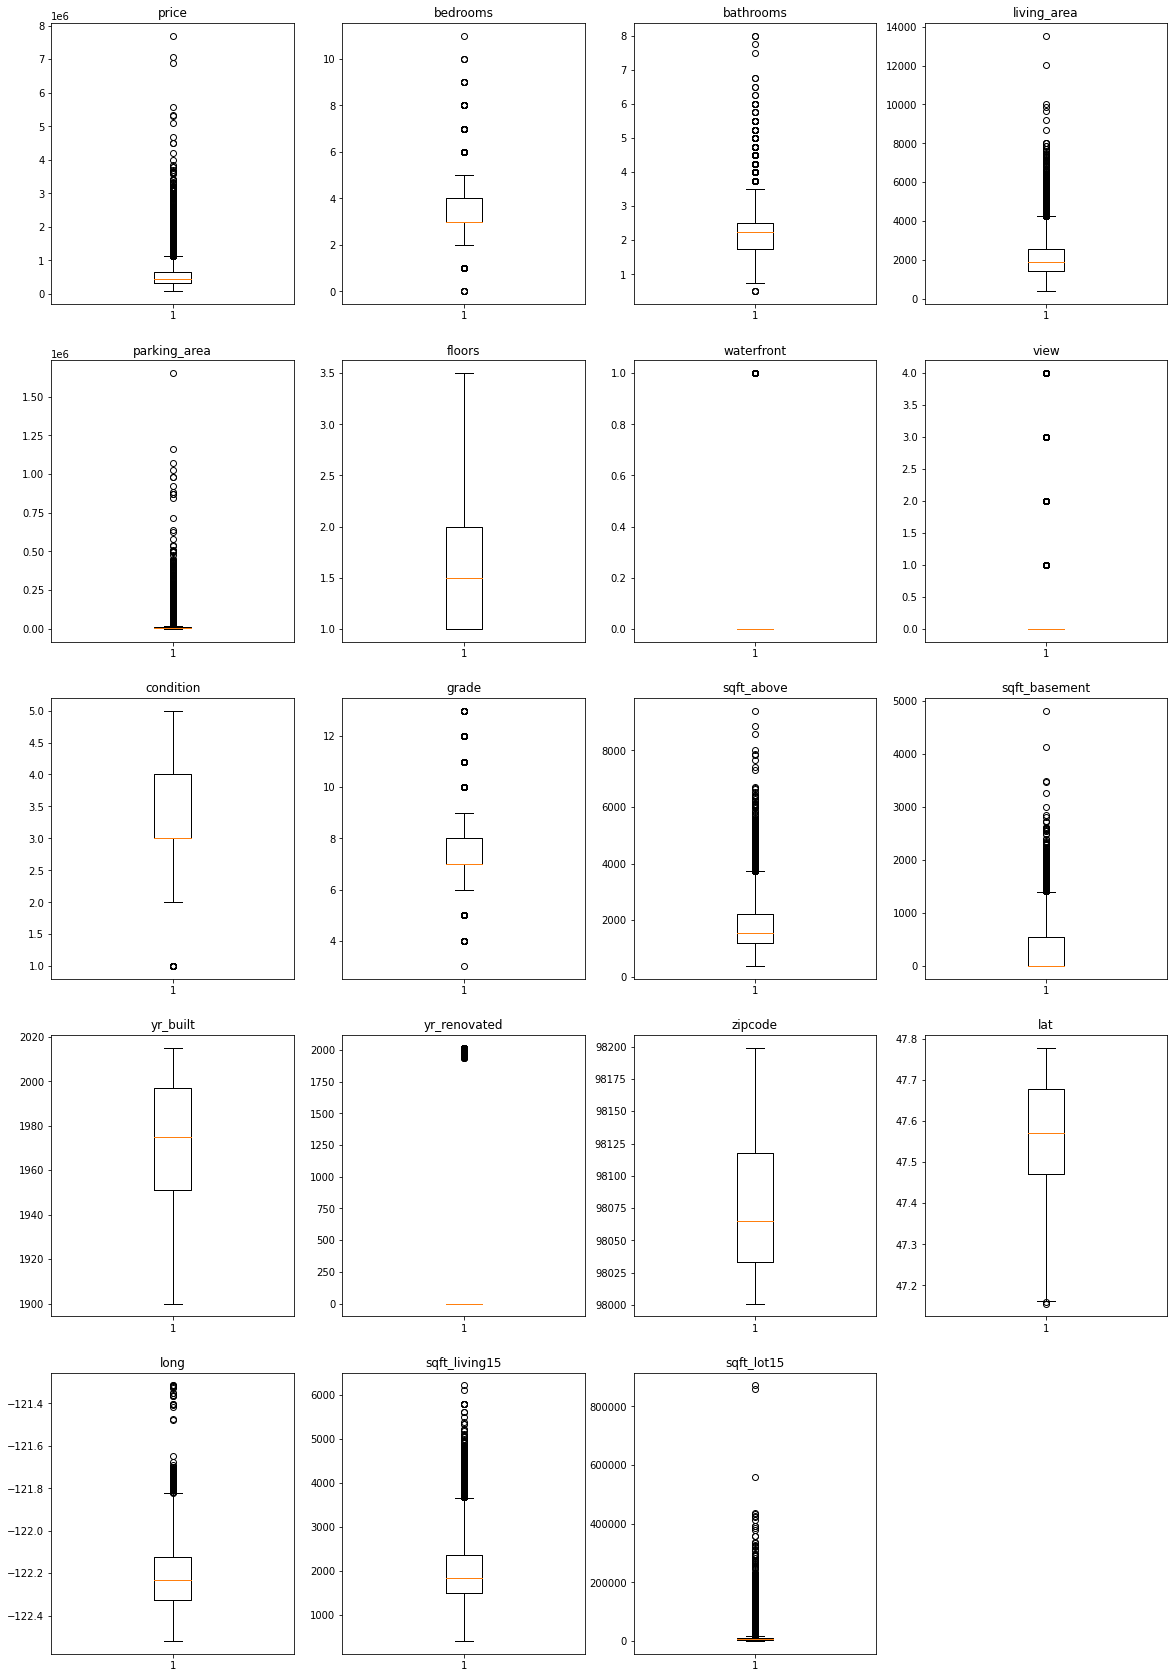

In [ ]:
#Checking for outliers
columns_dict={'price':1, 'bedrooms':2, 'bathrooms':3, 'living_area':4, 'parking_area':5,
       'floors':6, 'waterfront':7, 'view':8, 'condition':9, 'grade':10, 'sqft_above':11,
       'sqft_basement':12, 'yr_built':13, 'yr_renovated':14, 'zipcode':15, 'lat':16, 'long':17,
       'sqft_living15':18, 'sqft_lot15':19}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)
plt.show()


We have many outliers but since it's the real estate sector we are dealing with which has ranges from low to extremes, we won't be removing them

## 5. Exploratory Analysis

### Categorical Variables

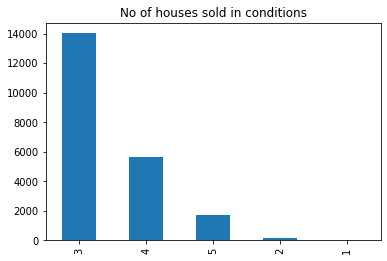

In [ ]:
#Houses in which type of condition were mostly sold out
data['condition'].value_counts().plot.bar(title='No of houses sold in conditions')

Most of the houses sold were in a fair condition

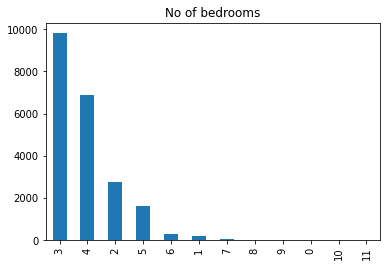

In [ ]:
#Number of bedrooms in different houses
data['bedrooms'].value_counts().plot.bar(title='No of bedrooms')

Most people purchase houses that are 3 bedroomed. Only a few people purchase one bedrommed houses

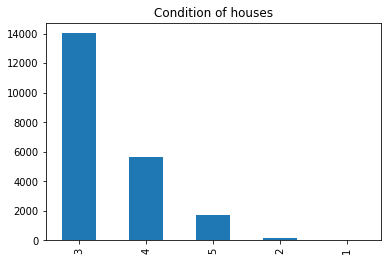

In [ ]:
data['condition'].value_counts().plot.bar(title='Condition of houses')

Most houses sold out were in a fairly good condition
It's hard to find a house that is in a perfect/very good condition in the market

In [ ]:
import plotly.express as px

fig = px.histogram(data, x="view", y="price", color="view")
fig.show()
#The highest number of houses sold out were those with 0 views

### Distribution of data

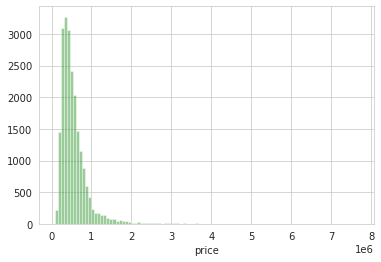

In [ ]:
#Check distribution of our data
#Target variable: Price
sns.set_style('whitegrid') 
sns.distplot(data['price'], kde = False, color ='green', bins = 100) 



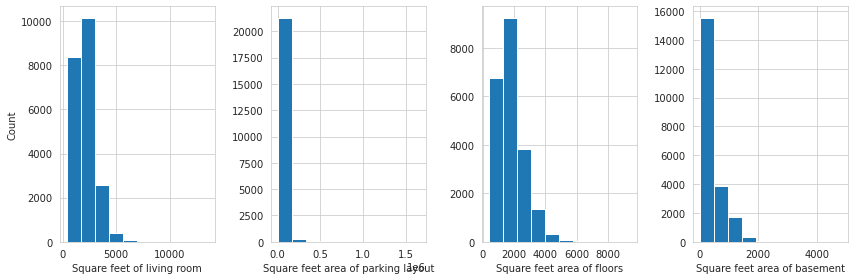

In [ ]:
#Distribution for the feature variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (12,4))

ax1.hist(data['living_area'], bins=10, edgecolor = 'white', align = 'mid')
ax1.set_xlabel('Square feet of living room')
ax1.set_ylabel('Count')

ax2.hist(data['parking_area'], edgecolor = 'white', align = 'mid')
ax2.set_xlabel('Square feet area of parking layout')

ax3.hist(data['sqft_above'], edgecolor = 'white', align = 'mid')
ax3.set_xlabel('Square feet area of floors')

ax4.hist(data['sqft_basement'], edgecolor = 'white', align = 'mid')
ax4.set_xlabel('Square feet area of basement')



plt.tight_layout()
plt.show()

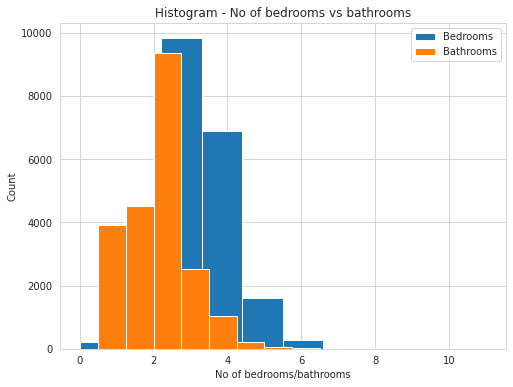

In [ ]:
plt.figure(figsize = (8,6))
plt.hist(data['bedrooms'], edgecolor = 'white', label = 'Bedrooms')
plt.hist(data['bathrooms'], edgecolor = 'white', label = 'Bathrooms')
plt.legend()
plt.title('Histogram - No of bedrooms vs bathrooms')
plt.xlabel('No of bedrooms/bathrooms')
plt.ylabel('Count')
plt.show()

Our variables are not normally distriburted.

Price is skewed to the right.

### Variable relationships

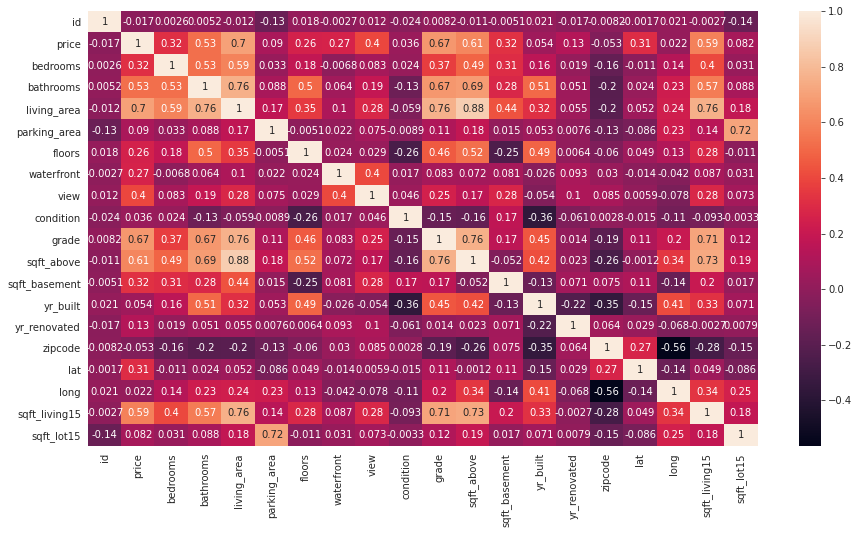

In [ ]:
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(method='pearson'), annot=True)

House prices have a linear relationship with square fit area of living area, grade,sqft above

Sqft of living area is highly correlated with number of bathrooms in a house, the house grade,sqft above

Grade is highly correlated with the sqft above and sqft living 15

In [ ]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"

px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 1000
px.defaults.height = 500

fig = px.scatter(data, x="living_area", y="price", color="bathrooms", width=600)
fig.show()
#As the sqft area of living room increases the price also increases and 
#the number of bathrooms also increase

In [ ]:
fig = px.scatter(data, x="living_area", y="bathrooms", color="bathrooms", width=600)
fig.show()
#As the square feet area of living area increases the number of bathrooms increases too

In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'living_area', 'parking_area',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
fig = px.scatter(data, x="living_area", y="sqft_above", color="grade", width=600)
fig.show()
#As the sqft for living area increases the area of sqft above increases too
#The grade level increases as these two increase, most houses have a grade of around 8

In [ ]:
fig = px.scatter(data, x="view", y="price", color="view", width=600)
fig.show()
#The number of views does not really affect prices

In [ ]:
! pip install geopandas
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.long, data.lat))
#geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 9.6MB/s 
     |████████████████████████████████| 14.8MB 303kB/s 


In [ ]:
gdf.head()

,id,price,bedrooms,bathrooms,living_area,parking_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650,POINT (-122.25700 47.51120)
1,6414100192,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639,POINT (-122.31900 47.72100)
2,5631500400,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062,POINT (-122.23300 47.73790)
3,2487200875,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000,POINT (-122.39300 47.52080)
4,1954400510,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503,POINT (-122.04500 47.61680)


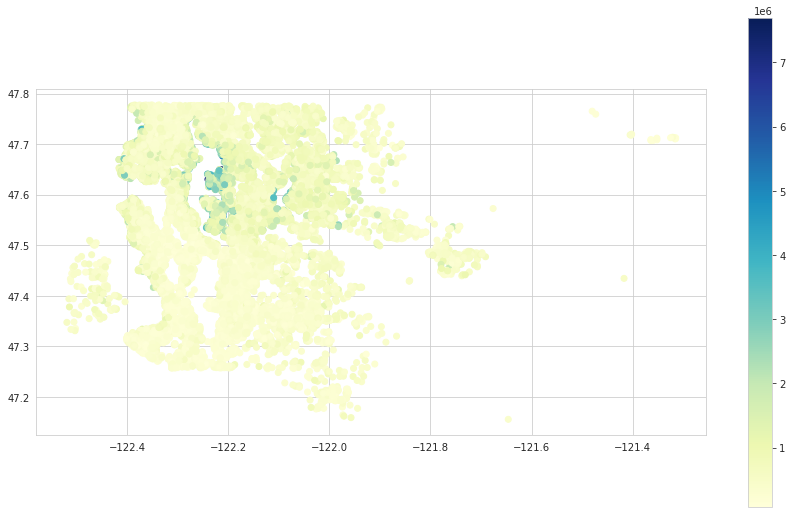

In [ ]:
ax = gdf.dropna().plot(column='price', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                  k=3, legend =  
                                  True);

Text(101.75, 0.5, 'Latitude')

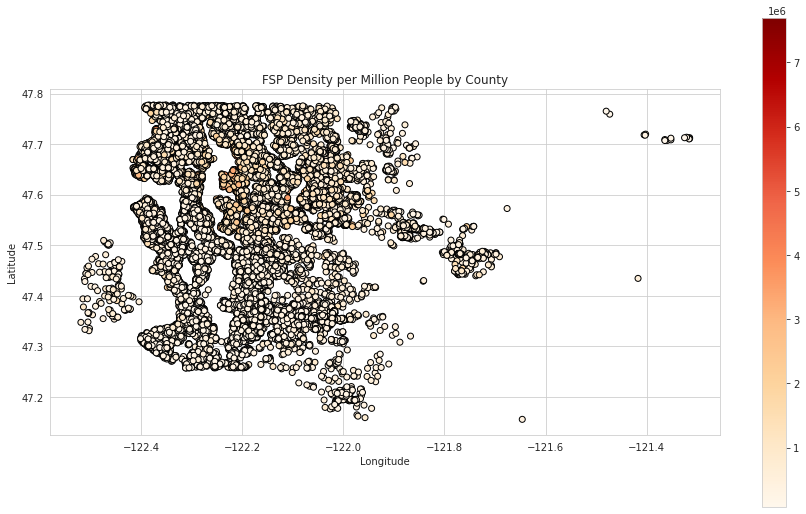

In [ ]:
gdf.plot(column='price', cmap = 'OrRd',figsize=(15,9), edgecolor='black', legend=True)
plt.title('FSP Density per Million People by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## 6. Modelling/ Regression Analysis

### **a. Multiple Linear Regression**

**Assumptions for MLR and Feature Engineering**


1.   The relationship between independent and dependent variables should be linear
2.   There should be no multicollinearlity in the data
3. Errors between observed predicted values should be normally distributed

Considering the above assumptions, we will do feature engineering to enable our data to fit a multiple linear regression model




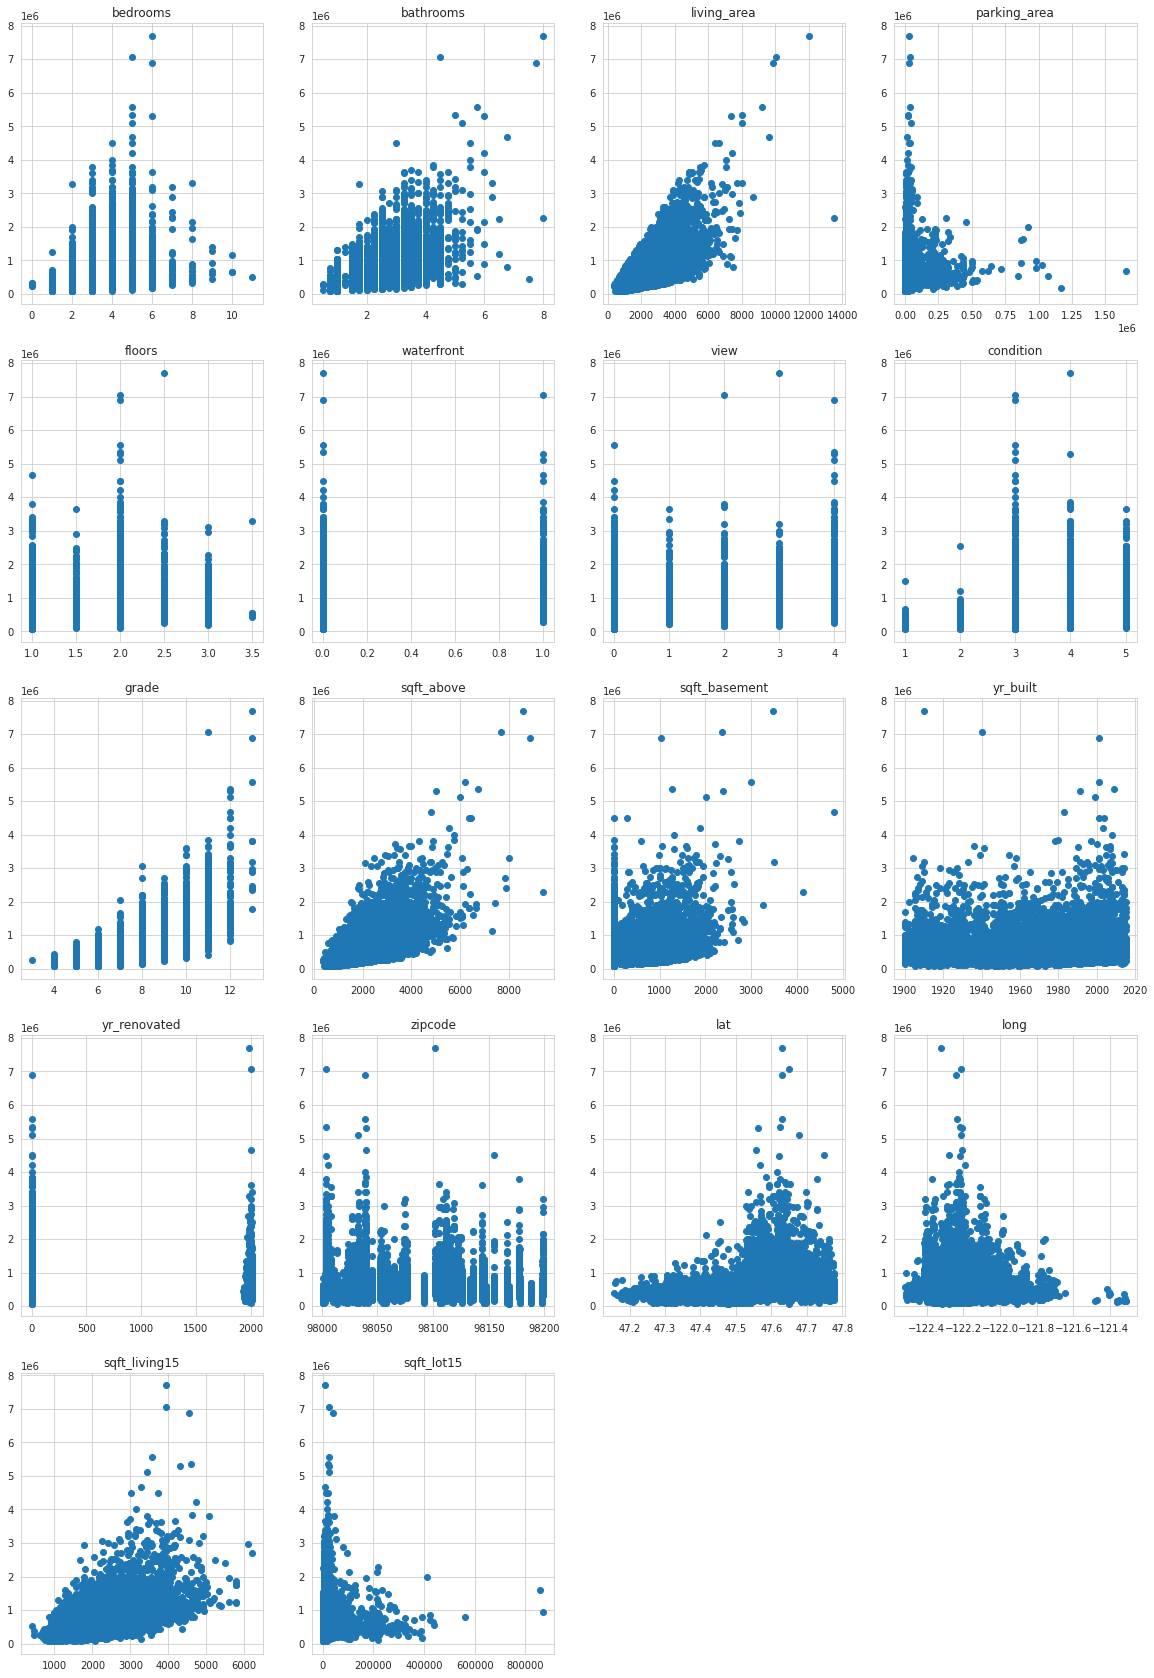

In [ ]:
#Checking that The relationship between independent and dependent variables should be linear 
columns_dict={'bedrooms':1, 'bathrooms':2, 'living_area':3, 'parking_area':4,
       'floors':5, 'waterfront':6, 'view':7, 'condition':8, 'grade':9, 'sqft_above':10,
       'sqft_basement':11, 'yr_built':12, 'yr_renovated':13, 'zipcode':14, 'lat':15, 'long':16,
       'sqft_living15':17, 'sqft_lot15':18}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.scatter(data[variable], data['price'])
  plt.title(variable)
plt.show()

From the scatter plots above we can see that the some attributes have a linear relationship with the target variable price. A number of independent variables violate this assumptions

In [ ]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'living_area', 'parking_area',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

In [ ]:
#Checking for multicollinearlity
features = data.drop(columns=['price', 'id'])
correlations = features.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,living_area,parking_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.708158,-0.471768,-0.478526,0.053281,0.045078,0.067948,0.118718,-0.046201,0.330492,-0.506977,-0.289434,0.141871,0.047952,0.085859,0.056547,0.015578,0.022644,0.090673
bathrooms,-0.471768,3.376599,-1.909716,-0.024143,-0.684889,0.010207,-0.045968,-0.138006,-0.269111,0.450379,-0.162299,-0.943598,-0.261358,0.041153,-0.043047,0.052528,0.091404,0.070676
living_area,-0.478156,-1.908289,-12555817680675.839844,0.029092,1.736081,-0.005972,-0.408391,-0.080490,-0.436858,11319884103395.835938,6053091821192.330078,0.126898,0.108180,-0.162301,-0.160536,0.236512,-0.482406,-0.078143
parking_area,0.053281,-0.024143,0.028430,2.102671,0.044944,0.027533,-0.058657,0.030694,-0.052547,-0.228344,-0.058334,0.099085,0.021563,-0.002318,0.053654,-0.133313,0.163770,-1.458925
floors,0.045078,-0.684889,1.735466,0.044944,2.014902,-0.006295,-0.038461,0.089603,-0.234553,-2.059205,-0.215678,-0.478044,-0.080166,-0.171329,-0.127000,0.164352,0.272213,0.072134
waterfront,0.067948,0.010207,-0.006124,0.027533,-0.006295,1.204234,-0.492542,-0.012624,0.051035,-0.111200,-0.003528,-0.021106,-0.065309,0.022990,0.010053,0.027532,0.054419,-0.018088
view,0.118718,-0.045968,-0.408405,-0.058657,-0.038461,-0.492542,1.436309,-0.021435,-0.185774,0.404872,-0.060519,0.153432,-0.039914,-0.140397,0.119331,0.071550,-0.325688,-0.007190
condition,-0.046201,-0.138006,-0.080802,0.030694,0.089603,-0.012624,-0.021435,1.249282,-0.049822,0.125709,-0.060089,0.561542,0.206800,0.161438,0.063442,-0.007917,0.074925,-0.028103
grade,0.330492,-0.269111,-0.431400,-0.052547,-0.234553,0.051035,-0.185774,-0.049822,3.428442,-1.242007,-0.292448,-0.637152,-0.070311,0.085499,-0.329845,0.390148,-0.913027,0.073361
sqft_above,-0.506343,0.447343,11319884103395.833984,-0.229047,-2.060379,-0.111333,0.404998,0.125539,-1.237325,-10205609811574.919922,-5457254925623.044922,0.403009,-0.100004,0.065558,0.322103,-0.552822,-1.096443,-0.109965


In [ ]:
features = features.drop(columns=['sqft_above'])
correlations = features.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,living_area,parking_area,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.708158,-0.471768,-1.039783,0.053281,0.045078,0.067948,0.118718,-0.046201,0.330492,-0.018897,0.141871,0.047952,0.085859,0.056547,0.015578,0.022644,0.090673
bathrooms,-0.471768,3.376599,-1.412104,-0.024143,-0.684889,0.010207,-0.045968,-0.138006,-0.269111,-0.400680,-0.943598,-0.261358,0.041153,-0.043047,0.052528,0.091404,0.070676
living_area,-1.039783,-1.412104,6.126985,-0.224964,-0.549256,-0.129460,0.040826,0.058756,-1.809277,-1.431409,0.573908,-0.002742,-0.089585,0.196735,-0.376668,-1.698562,-0.200114
parking_area,0.053281,-0.024143,-0.224964,2.102671,0.044944,0.027533,-0.058657,0.030694,-0.052547,0.063775,0.099085,0.021563,-0.002318,0.053654,-0.133313,0.163770,-1.458925
floors,0.045078,-0.684889,-0.549256,0.044944,2.014902,-0.006295,-0.038461,0.089603,-0.234553,0.885583,-0.478044,-0.080166,-0.171329,-0.127000,0.164352,0.272213,0.072134
waterfront,0.067948,0.010207,-0.129460,0.027533,-0.006295,1.204234,-0.492542,-0.012624,0.051035,0.055929,-0.021106,-0.065309,0.022990,0.010053,0.027532,0.054419,-0.018088
view,0.118718,-0.045968,0.040826,-0.058657,-0.038461,-0.492542,1.436309,-0.021435,-0.185774,-0.277010,0.153432,-0.039914,-0.140397,0.119331,0.071550,-0.325688,-0.007190
condition,-0.046201,-0.138006,0.058756,0.030694,0.089603,-0.012624,-0.021435,1.249282,-0.049822,-0.127318,0.561542,0.206800,0.161438,0.063442,-0.007917,0.074925,-0.028103
grade,0.330492,-0.269111,-1.809277,-0.052547,-0.234553,0.051035,-0.185774,-0.049822,3.428442,0.371754,-0.637152,-0.070311,0.085499,-0.329845,0.390148,-0.913027,0.073361
sqft_basement,-0.018897,-0.400680,-1.431409,0.063775,0.885583,0.055929,-0.277010,-0.127318,0.371754,1.987462,-0.032168,-0.013480,-0.041073,-0.177890,0.330930,0.349179,0.034113


The VIF factor dropped after removing square feet above

In [131]:
df= data.drop(columns=['sqft_above', 'id', 'geometry'])
df.head(1)

,price,bedrooms,bathrooms,living_area,parking_area,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,0,1955,0,98178,47.511200,-122.257000,1340,5650


**Modelling with features that have a linear relationship with price excluding sqft_above**

In [132]:
 
 df_linear = df[['price','bedrooms','bathrooms', 'living_area', 'sqft_basement']].copy()
 df_linear.head()

,price,bedrooms,bathrooms,living_area,sqft_basement
0,221900.000000,3,1.000000,1180,0
1,538000.000000,3,2.250000,2570,400
2,180000.000000,2,1.000000,770,0
3,604000.000000,4,3.000000,1960,910
4,510000.000000,3,2.000000,1680,0


In [136]:
#Splitting the data
Xa = df.iloc[:, 1:5].values
ya = df.iloc[:, 0].values
print(Xa)
print(ya)

[[3.000e+00 1.000e+00 1.180e+03 5.650e+03]
 [3.000e+00 2.250e+00 2.570e+03 7.242e+03]
 [2.000e+00 1.000e+00 7.700e+02 1.000e+04]
 ...
 [2.000e+00 7.500e-01 1.020e+03 1.350e+03]
 [3.000e+00 2.500e+00 1.600e+03 2.388e+03]
 [2.000e+00 7.500e-01 1.020e+03 1.076e+03]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [137]:
# Scaling data 
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xa)
Xa = scaler.transform(X)
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = 0.2, random_state=25)

In [138]:
#Fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xa_train, ya_train)
ya_pred = model.predict(Xa_test)

In [139]:
# To compare the actual output values for X_test with the predicted values
# 
dfa = pd.DataFrame({'Actual': ya_test, 'Predicted': ya_pred})
dfa.head()

,Actual,Predicted
0,1080000.000000,507162.016517
1,925000.000000,546513.703591
2,621000.000000,486944.521655
3,485500.000000,415983.245605
4,485000.000000,679363.381716


In [140]:
# print the coefficients and intercept
print('Coefficients: \n', model.coef_)

print('Intercept: \n',model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ya_test, ya_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(ya_test, ya_pred))

Coefficients: 
 [-5.23694833e+04  2.69730211e+03  2.67687200e+08 -6.59630492e+08]
Intercept: 
 366296080.8981309
Mean squared error: 72463788732.07
Coefficient of determination: 0.51


Using only the four features that have a linear relationship with price we get a r-squared of 51% and a MSE of   72,463,788,732.07

**Modelling with all the features after dropping sqft_above**

In [ ]:
#Splitting the data
X = df.iloc[:, 1:18].values
y = df.iloc[:, 0].values
print(X)
print(y)

[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [ ]:
# Scaling data 
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [ ]:
#Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,1080000.000000,734723.961517
1,925000.000000,784360.977761
2,621000.000000,623980.216252
3,485500.000000,406118.559887
4,485000.000000,372890.373360


In [ ]:
# print the coefficients and intercept
print('Coefficients: \n', regressor.coef_)

print('Intercept: \n',regressor.intercept_)

Coefficients: 
 [-33022.00183619  29759.10255415 164359.62510159   4317.93882829
   4415.11159975  50521.84709087  40034.56217375  16497.94949881
 112724.54624251 -13717.7540121  -76463.86619654   6451.18639143
 -32004.30683336  82959.82294591 -30047.9890658   16320.91346915
  -9254.31067356]
Intercept: 
 539405.9641886232


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y_test, y_pred))

Mean squared error: 45859914525.23
Coefficient of determination: 0.69


Using all features, our model seems to improve with a mean squared error of 45,859,914,525.23 and r2 at 0.69%. We can conclude that the variables explain upto 69% of the target variable.

## 7. Recommendation

Text(0.5, 1.0, 'Residual plot')

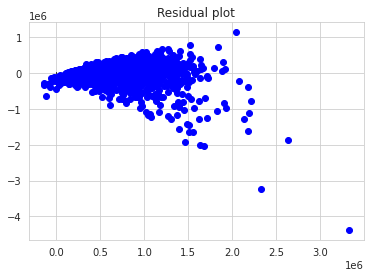

In [ ]:
#residual plot

x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')



In [ ]:
from scipy.stats import bartlett
from scipy.stats import chi2
residuals = y_pred - y_test
test_result, p_value = bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = chi2.ppf(probability, degree_of_freedom)
# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data
# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


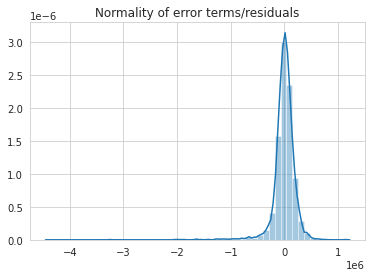

In [ ]:
#Distribution of error terms
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Our Multiple Linear Regression,performed well. Using all features it can predict the price to an accurancy of 69%. But some of our factors suffered from multicollinearlity, thus it is important to apply regularization techniques to solve this. Also our target variable price was skewed, which means we should try a different kind of approach like Quantile regression.

## 8. Challenging the solution

### **b. Regularization Models**



### **b1. Ridge regression**

Ridge regression is a technique that is specialized to analyze multiple regression data which exhibits multicollinearity in nature. Multicollinearity refers to the phenomenon where there are high correlations between more than two independent/predicted variables. 

In our data, while performing VIF we noted the multicollinearlity in our data which forced has to eliminate some features during Multiple Linear regression modelling.

Since ridge regression regularizes this, we will all the variables in this step to check how the model performs as compared to multiple linear regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
df1= data.drop(columns=['id', 'geometry'])
df1.head(1)

,price,bedrooms,bathrooms,living_area,parking_area,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650


In [ ]:
#Splitting the data
X1 = df1.iloc[:, 1:19].values
y1 = df1.iloc[:, 0].values
print(X1)
print(y1)

[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [ ]:
# Scaling data 
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=25)

In [ ]:
 # Fit a ridge regression on the training data
 #First on alpha=0 (OLS) for comparison
from sklearn.linear_model import Ridge, RidgeCV
ridge = Ridge(alpha = 0, normalize = True)
ridge.fit(X1_train, y1_train)             
y1_pred = ridge.predict(X1_test)          

In [ ]:
# print the coefficients and intercept
print('Coefficients: \n', ridge.coef_)

print('Intercept: \n',ridge.intercept_)

Coefficients: 
 [-33022.00183619  29759.10255415  81087.74741759   4317.93882829
   4415.11159975  50521.84709087  40034.56217375  16497.94949881
 112724.54624251  75074.99936907  26427.16801237 -76463.86619654
   6451.18639143 -32004.30683336  82959.82294591 -30047.9890658
  16320.91346915  -9254.31067356]
Intercept: 
 539405.9641886165


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y1_test, y1_pred))

Mean squared error for OLS: 45859914525.23
Coefficient of determination: 0.69


In [ ]:
#Using cross validation to find the best value for alpha
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X1_train, y1_train)
ridgecv.alpha_

0.005

In [ ]:
ridge2 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge2.fit(X1_train, y1_train)
y2_pred = ridge2.predict(X1_test)
df = pd.DataFrame({'Actual': y1_test, 'Predicted': y2_pred})
df.head()

,Actual,Predicted
0,1080000.000000,733672.706022
1,925000.000000,783329.639240
2,621000.000000,622899.388803
3,485500.000000,406999.152777
4,485000.000000,375078.538740


In [ ]:
# print the coefficients and intercept
print('Coefficients: \n', ridge2.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y1_test, y2_pred))

# The mean squared error
print('Mean squared error : %.2f'
      % mean_squared_error(y1_test, y2_pred))

Coefficients: 
 [-32423.81135538  29664.148697    80646.99621721   4309.21742916
   4574.69429165  50345.51324737  40045.14623096  16618.47953224
 111667.46604728  74585.80878229  26436.8813278  -75521.63576216
   6668.84365276 -31416.94011666  82645.30173099 -29917.41761756
  17272.51453829  -9118.54270991]
Coefficient of determination: 0.69
Mean squared error : 45889996917.56


Using alpha = 0.005, the coefficient have reduced as compared to OLS but our r-squared didn't change much.
We will therefore try with an alpha value that's greater than 0.005

In [ ]:
ridge3 = Ridge(alpha=1, normalize=True)

ridge3.fit(X1_train,y1_train)

y3_pred = ridge3.predict(X1_test)

# print the coefficients 
print('Coefficients: \n', ridge3.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y1_test, y3_pred))

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(y1_test, y3_pred))


Coefficients: 
 [  3371.18715667  27138.30106502  51565.61870497   2912.01103804
  10302.58199365  30925.72447395  34268.33417028  12545.59788265
  56711.40494256  43895.93891881  24076.46114464 -23649.06607416
  11757.62795082  -2649.64882233  46317.16937546 -13450.48582045
  37844.0474269    -370.21827377]
Coefficient of determination: 0.61
Mean squared error for OLS: 57702437799.32


The MSE has reduced

There is no much difference between OLS and ridge regression when we use the alpha value 0.005 that is produced by cross validation. Increasing the value of alpha reduces the the MSE but reduces the perfomance of the model from 69% to 61%. The ridge regression performs it's duty since it reduces the coefficients and draws them closer to 0 than in the OLS model. 

This model does not work very well here because our there is not muchh multicollinearlity in our data. Also, our linear regression model performs at an r-squared of 0.69 which is a good performance and not really overfit.

### **b2. Lasso Regression**

Lasso (least absolute shrinkage and selection operator) regression performs L1 regularization. The absolute value of the magnitude of the coefficient is added as the penalty term to the loss function. So some variables can become zero because of L1 regularization. It means that by doing this, it can do feature selection and prevent overfitting.

If a group of predictors is highly correlated among themselves, lasso regression tends to pick only one of them and will shrink the others to zero.

It has a tuning parameter, λ. As λ increases, more coefficients likely to be zero and bias increase. If it is infinite, then all of the coefficients are zero. As it decreases, variance increases. In our case we use alpha as the tuning parameter

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import scale 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 384607691570.875, tolerance: 227986409967.118

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 384119605664.625, tolerance: 227986409967.118



Text(0, 0.5, 'weights')

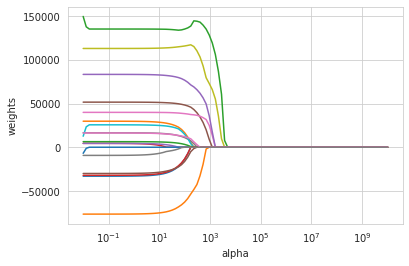

In [ ]:
lasso = Lasso(max_iter = 100000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X1_train), y1_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
#Finding the best value of alpha using cross validation
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X1_train, y1_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X1_train, y1_train)

Lasso(alpha=1.941379402684015, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y4_pred = lasso.predict(X1_test)

# print the coefficients 
print('Coefficients: \n', lasso.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y1_test, y4_pred))

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(y1_test, y4_pred))


Coefficients: 
 [-32279.98406046  29288.69651196 135856.66984007   3456.51409361
   4100.72493984  50387.93958065  39998.07806815  16269.88522087
 112876.13671948  25367.95157771      0.         -75925.05044225
   6326.88498527 -31269.42801014  82702.24393131 -29492.71755012
  16074.53679901  -8354.27378931]
Coefficient of determination: 0.69
Mean squared error for OLS: 45891901411.49


Using the value of alpha provided by cross validation, the value of MSE and R-Squared remain the same. It is also important to note that the coefficients have reduced and the model performed feature selection as expected. The coefficient for the variable square feet area of basement was completely reduced to 0 and hence removed from the analysis.

### **b3. ElasticNet Regression**

Elastic net is basically a combination of both L1 and L2 regularization, i.e; a combination of lasso and ridge regression. 
If there is a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consisting of these correlated variables. If any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.
In our case we will use all our features for this regression, and compare it perfomance with OLS.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [ ]:
#Normalizing data and creating grid
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(X1_train,y1_train)
print(search.best_params_)

abs(search.best_score_)


{'alpha': 1e-05, 'l1_ratio': 0.8}


39349673597.997604

In [ ]:
1e-05

1e-05

In [ ]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X1_train,y1_train)
y5_pred=elastic.predict(X1_test)
# print the coefficients 
print('Coefficients: \n', elastic.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y1_test, y5_pred))

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(y1_test, y5_pred))


Coefficients: 
 [-29149.46169077  29212.97291021  78255.99963214   4230.35979162
   5393.19344987  49327.72530886  40098.57740542  17177.53834207
 106110.57858748  71937.57002869  26479.07922207 -70491.77770501
   7785.26584367 -28242.56409032  80807.88133375 -29095.40343112
  22052.95658006  -8358.11636632]
Coefficient of determination: 0.69
Mean squared error for OLS: 46111736367.77


Comparing lasso, Ridge and elasicnet regression, 

### **b4. Quantile Regression**

In [198]:
df_quant = data.drop(columns=['id', 'geometry', 'sqft_above'])


In [199]:
df_quant.columns

Index(['price', 'bedrooms', 'bathrooms', 'living_area', 'parking_area',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [200]:
#Feature Selection
df_corr = df_quant.corr(method='pearson')['price']  
golden_features_list = df_corr[abs(df_corr) > 0.3]
golden_features_list


price           1.000000
bedrooms        0.316055
bathrooms       0.525886
living_area     0.701922
view            0.397397
grade           0.667865
sqft_basement   0.323886
lat             0.306730
sqft_living15   0.585203
Name: price, dtype: float64

In [201]:
quant = df_quant[['price','bedrooms','bathrooms', 'living_area','view','grade', 'sqft_basement', 'lat', 'sqft_living15']].copy()
quant.head()

,price,bedrooms,bathrooms,living_area,view,grade,sqft_basement,lat,sqft_living15
0,221900.000000,3,1.000000,1180,0,7,0,47.511200,1340
1,538000.000000,3,2.250000,2570,0,7,400,47.721000,1690
2,180000.000000,2,1.000000,770,0,6,0,47.737900,2720
3,604000.000000,4,3.000000,1960,0,7,910,47.520800,1360
4,510000.000000,3,2.000000,1680,0,8,0,47.616800,1800


In [214]:
#Separating features from target
fet = quant[['bedrooms','bathrooms', 'living_area','view','grade', 'sqft_basement', 'lat', 'sqft_living15']].copy()
var = quant['price']
#Creating traing and testing set
fet_train, fet_test, var_train, var_test = train_test_split(fet, var, test_size = 0.3, random_state = 0)

In [215]:
import statsmodels.formula.api as smf
#Creating a quantile regression model
mod = smf.quantreg('price ~ bedrooms + bathrooms + living_area + view + grade + sqft_basement + lat + sqft_living15', quant)
#Getting summary for 50% quantile
res1 = mod.fit(q=.5)
print(res1.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4315
Model:                       QuantReg   Bandwidth:                   2.066e+04
Method:                 Least Squares   Sparsity:                    2.668e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21603
Time:                        13:59:47   Df Residuals:                    21594
                                        Df Model:                            8
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.912e+07   3.17e+05    -91.896      0.000   -2.97e+07   -2.85e+07
bedrooms      -1.657e+04   1293.481    -12.807      0.000   -1.91e+04    -1.4e+04
bathrooms     -6685.7475   1886.952     -3.543      0.000   -1.04e+04   -2987.183
living_area     120.9307      2.353  

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning:

Maximum number of iterations (1000) reached.



In [216]:
#Summary for 25%
res2 = mod.fit(q=.25)
print(res2.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3930
Model:                       QuantReg   Bandwidth:                   1.884e+04
Method:                 Least Squares   Sparsity:                    3.008e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21603
Time:                        14:00:08   Df Residuals:                    21594
                                        Df Model:                            8
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -2.23e+07   3.55e+05    -62.861      0.000    -2.3e+07   -2.16e+07
bedrooms      -1.211e+04   1228.259     -9.856      0.000   -1.45e+04   -9697.883
bathrooms      4841.6780   1815.751      2.666      0.008    1282.672    8400.684
living_area      96.2727      2.208  

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning:

Maximum number of iterations (1000) reached.



In [217]:
quantiles = [0.25,0.5,0.75]
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bedrooms']] + res.conf_int().loc['bedrooms'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept','totchr_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning:

Maximum number of iterations (1000) reached.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning:

Maximum number of iterations (1000) reached.



        qt        intercept   totchr_coef  cf_lower_bound  cf_upper_bound
0 0.250000 -22301315.167170 -12105.360514   -14512.838506    -9697.882523
1 0.500000 -29122734.170391 -16565.916826   -19101.235415   -14030.598237
2 0.750000 -35489854.311863 -20856.885656   -24571.278606   -17142.492706


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning:

Maximum number of iterations (1000) reached.



In [222]:
import statsmodels.regression.quantile_regression as Q_reg


quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(var_train, fet_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.5
q = 0.5
Y_test_pred1 = Q_reg.QuantReg(var_train, fet_train).fit(q=0.25).predict(fet_test)
Y_test_pred2 = Q_reg.QuantReg(var_train, fet_train).fit(q=0.5).predict(fet_test)
Y_test_pred3 = Q_reg.QuantReg(var_train, fet_train).fit(q=0.75).predict(fet_test)
r2_50 = r2_score(var_test,Y_test_pred2)
r2_25 = r2_score(var_test,Y_test_pred1)
r2_75 = r2_score(var_test,Y_test_pred3)
print('R2 score for the 50th percentile is {}'.format(r2_50) ) 
print('R2 score for the 25th percentile is {}'.format(r2_25) ) 
print('R2 score for the 75th percentile is {}'.format(r2_75) ) 

R2 score for the 50th percentile is 0.541681766550909
R2 score for the 25th percentile is 0.3525017987420429
R2 score for the 75th percentile is 0.5035544416878264


## 9. Conclusion

**Model Perfomance:**

Multiple Linear Regression performed the best. The model was neither overfitted nor underfitted. Though affected by multicollinearlity,the model improves a great deal after using Lasso regression by removing the correlated variables. 

This models should also be examined on new data to check their perfomance.